In [4]:
# ---------------------------------------------------------------------------------------------------------------

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
marketing_df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
m_df = marketing_df.copy()
# marketing_df.head(3)

In [7]:
# ---------------------------------------------------------------------------------------------------------------
# 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical 
# columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data 
# types and categorical data types respectively)

In [8]:
numerical = m_df.select_dtypes(include=[np.number])
numerical.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

In [9]:
categorical = m_df.select_dtypes(include=[object])
categorical.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [11]:
# ---------------------------------------------------------------------------------------------------------------
# 2. Now we will try to check the normality of the numerical variables visually
#     · Use seaborn library to construct distribution plots for the numerical variables
#     · Use Matplotlib to construct histograms
#     · Do the distributions for different numerical variables look like a normal distribution?

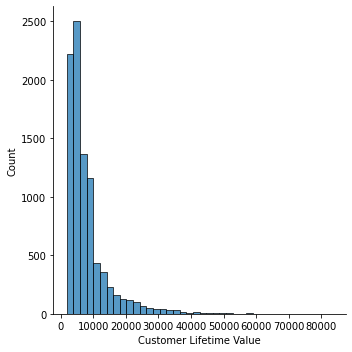

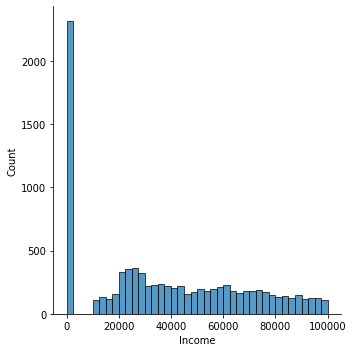

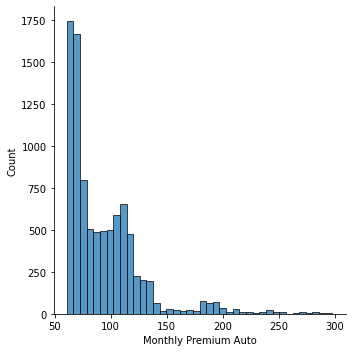

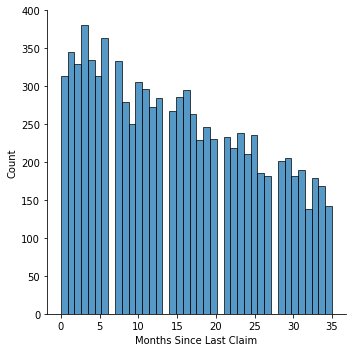

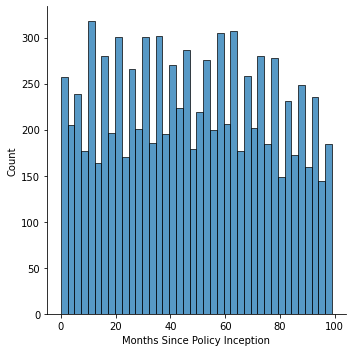

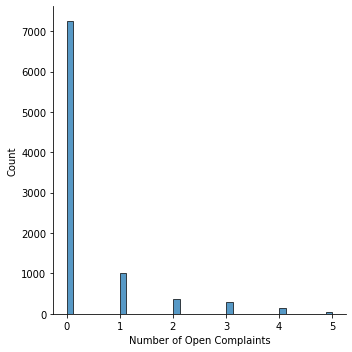

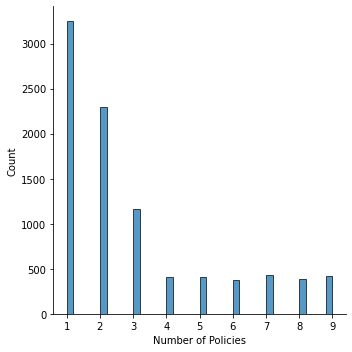

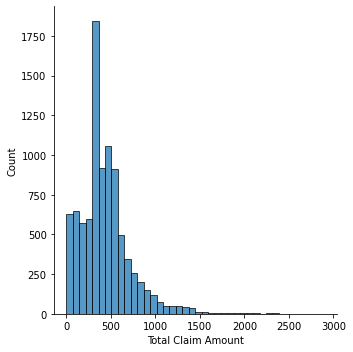

In [12]:
for column in numerical.columns:
    sns.displot(x=column, data = numerical, bins = 40, palette="Set1")

plt.show()

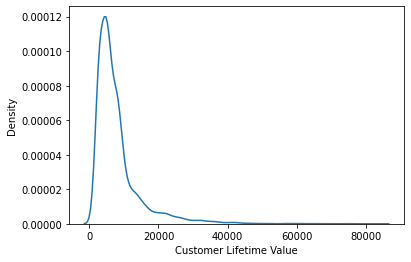

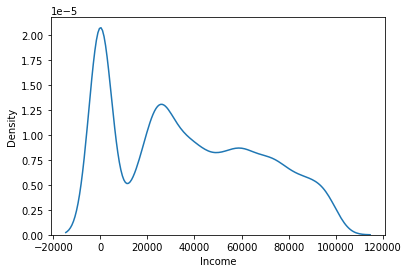

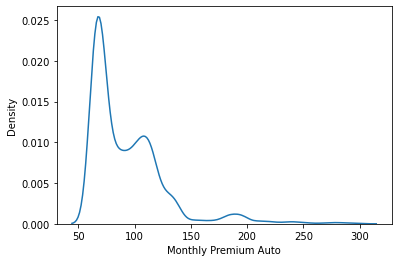

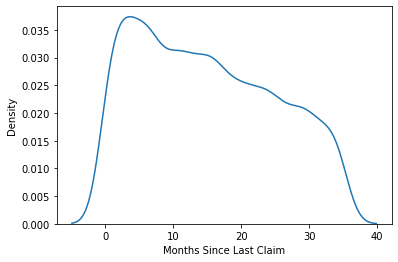

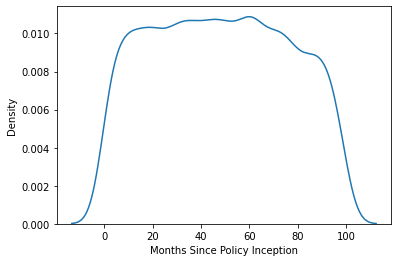

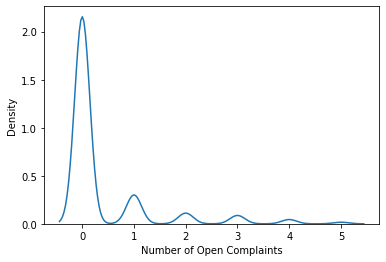

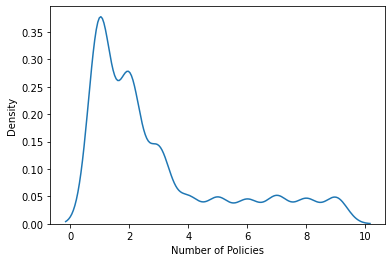

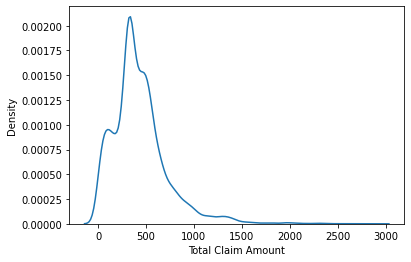

In [16]:
for column in numerical.columns:
    sns.kdeplot(x=column, data= numerical)
    plt.show()

In [ ]:
# -- the plots do not look like normal distributions -- 

In [13]:
# ---------------------------------------------------------------------------------------------------------------
# 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use 
# the column total_claim_amount later as the target variable.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = numerical.columns
vif_data["VIF"] = [variance_inflation_factor(numerical.values, i) for i in range(len(numerical.columns))]
vif_data

,feature,VIF
0,Customer Lifetime Value,2.806978
1,Income,2.831329
2,Monthly Premium Auto,14.130566
3,Months Since Last Claim,2.784766
4,Months Since Policy Inception,3.267760
5,Number of Open Complaints,1.166620
6,Number of Policies,2.299313
7,Total Claim Amount,6.666879


In [63]:
# For the data cleaned:
vif_data_clean = pd.DataFrame()
vif_data_clean["feature"] = numerical_clean.columns
vif_data_clean["VIF"] = [variance_inflation_factor(numerical_clean.values, i) for i in range(len(numerical_clean.columns))]
vif_data_clean

,feature,VIF
0,Customer Lifetime Value,2.825837
1,Income,4.427925
2,Monthly Premium Auto,13.524535
3,Months Since Last Claim,2.831281
4,Months Since Policy Inception,3.366394
5,Number of Open Complaints,1.171290
6,Number of Policies,2.313510
7,Total Claim Amount,5.853686


In [ ]:
# ---------------------------------------------------------------------------------------------------------------
# 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both
# the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, 
# then do not drop any features

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


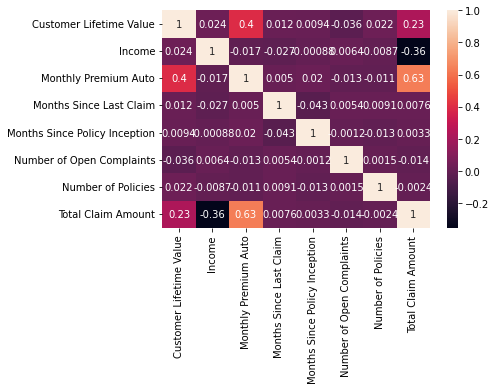

In [64]:
correlations_matrix = numerical.corr()
display(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
# As shown in the heatmap there are no pair of values with a correlation higher than 0.9